# Sales Performance & Profitability Analysis (Enhanced)

This notebook provides an end-to-end analysis of a retail dataset using Python's data analysis libraries.

### Key Features:
- Revenue & Profit Trends
- Product and Regional Performance
- Channel Profitability
- Profit Margin Evaluation
- Discount Impact
- Weekday Performance
- KPI Summary Box
- Visual Improvements


## 1. Load Data and Generate KPIs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Excel file
df = pd.read_excel("Sales_Performance_Profitability_Dataset.xlsx")

# Convert date columns
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['YearMonth'] = df['OrderDate'].dt.to_period('M')
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month
df['Weekday'] = df['OrderDate'].dt.day_name()

# Base KPIs
df['ProfitMargin(%)'] = (df['Profit'] / df['TotalRevenue']) * 100
total_sales = df['TotalRevenue'].sum()
total_profit = df['Profit'].sum()
avg_margin = df['ProfitMargin(%)'].mean()

# KPI Display
print(f"Total Revenue: ${total_sales:,.0f}")
print(f"Total Profit: ${total_profit:,.0f}")
print(f"Average Profit Margin: {avg_margin:.2f}%")

Total Revenue: $9,809,264
Total Profit: $2,109,964
Average Profit Margin: 28.03%


## 2. Monthly Revenue and Profit Trends (with Growth %)

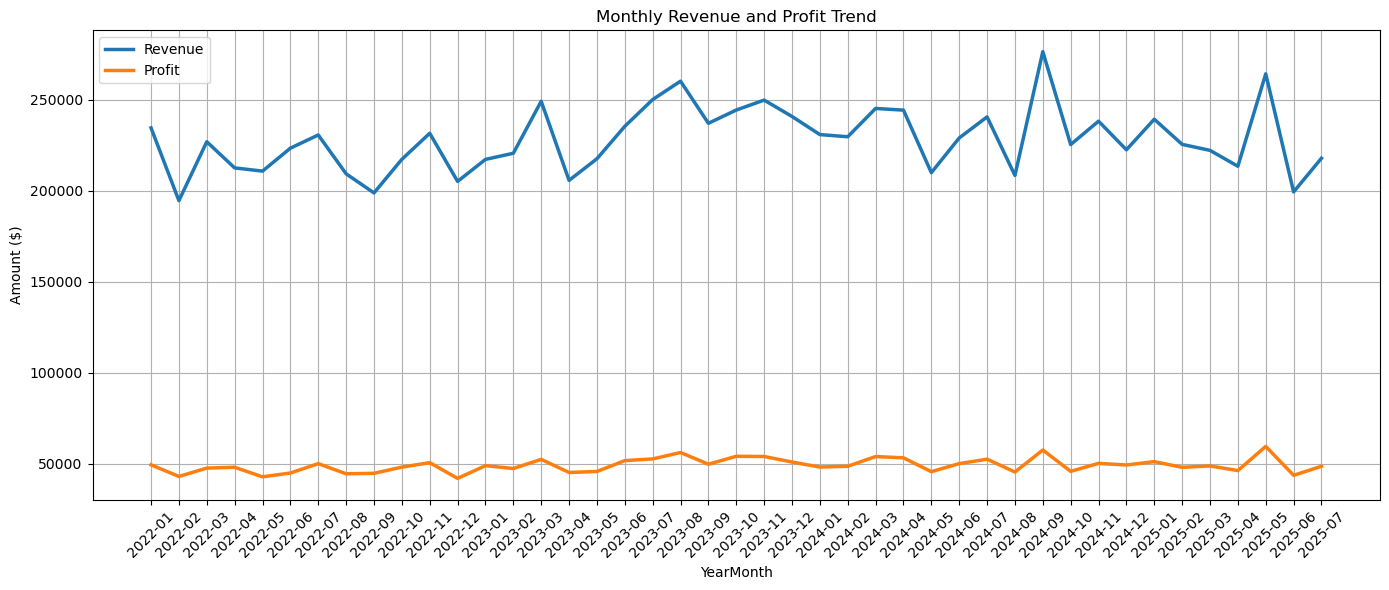

Latest Month: 2025-07 → Revenue: $217,960, Profit: $48,580
Peak Month: 2024-09 → Revenue: $276,525
Year-over-Year Growth: -9.43%
Overall Trend: Downward


In [2]:
monthly_summary = df.groupby('YearMonth')[['TotalRevenue', 'Profit']].sum().reset_index()
monthly_summary['YearMonth'] = monthly_summary['YearMonth'].astype(str)
monthly_summary['YoY_Growth(%)'] = monthly_summary['TotalRevenue'].pct_change(periods=12) * 100

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_summary, x='YearMonth', y='TotalRevenue', label='Revenue', linewidth=2.5)
sns.lineplot(data=monthly_summary, x='YearMonth', y='Profit', label='Profit', linewidth=2.5)
plt.title('Monthly Revenue and Profit Trend')
plt.xticks(rotation=45)
plt.ylabel('Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

latest = monthly_summary.iloc[-1]
peak = monthly_summary.loc[monthly_summary['TotalRevenue'].idxmax()]
trend = "Upward" if monthly_summary['TotalRevenue'].iloc[-1] > monthly_summary['TotalRevenue'].iloc[0] else "Downward"

print(f"Latest Month: {latest['YearMonth']} → Revenue: ${latest['TotalRevenue']:,.0f}, Profit: ${latest['Profit']:,.0f}")
print(f"Peak Month: {peak['YearMonth']} → Revenue: ${peak['TotalRevenue']:,.0f}")
print(f"Year-over-Year Growth: {latest['YoY_Growth(%)']:.2f}%")
print(f"Overall Trend: {trend}")

## 3. Product-Level Profitability (Top & Bottom Products)

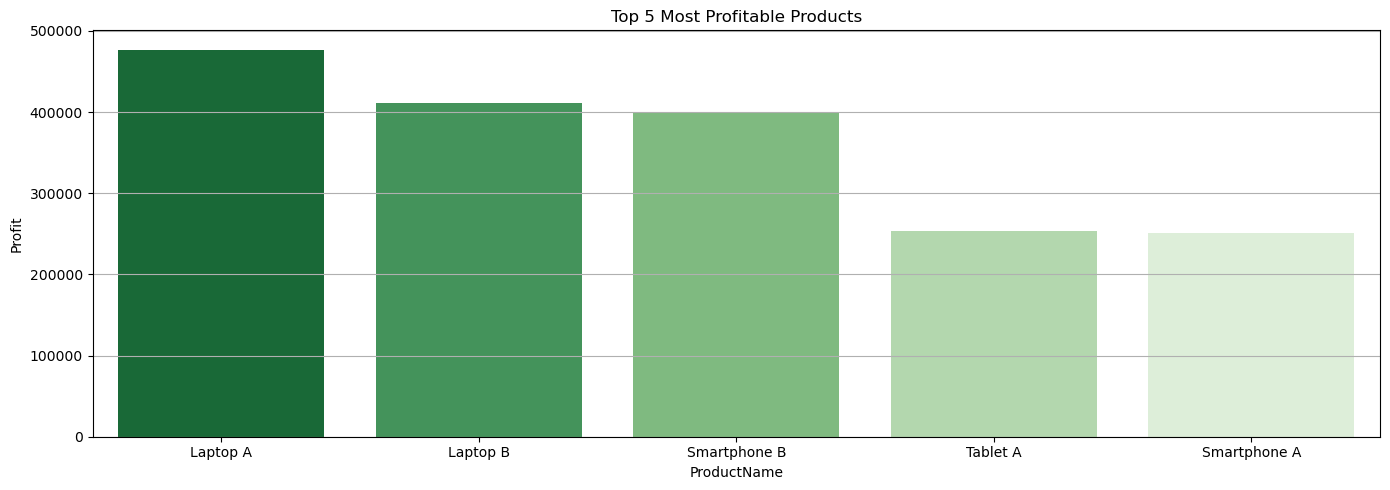

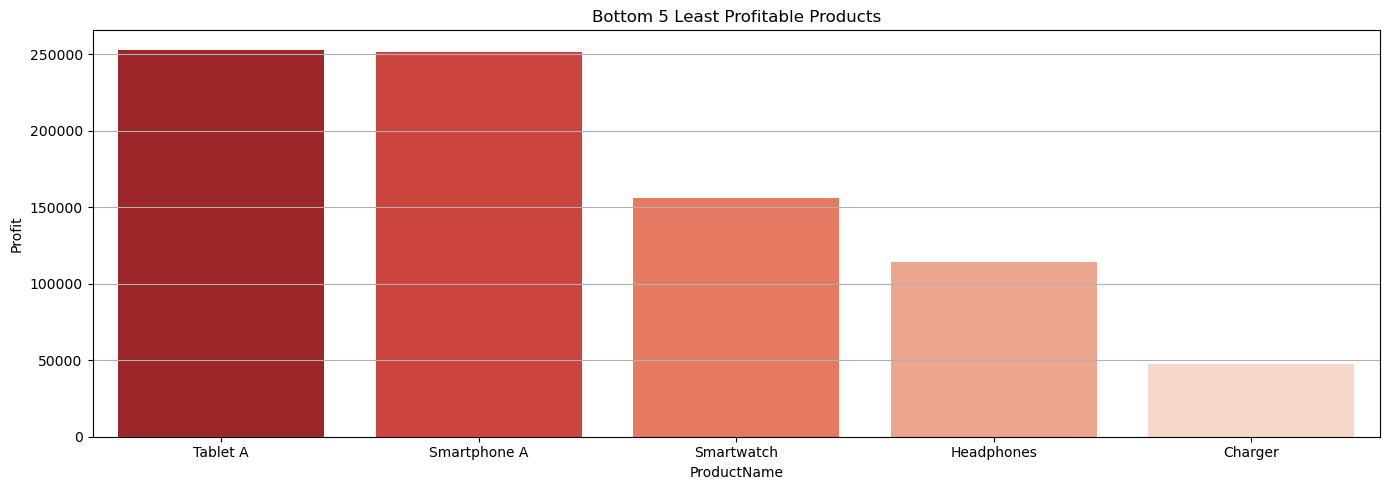

Top Product: Laptop A → Total Profit: $476,970
Bottom Product: Charger → Total Profit: $47,590


In [3]:
product_perf = df.groupby(['ProductName', 'Category'])[['TotalRevenue', 'Profit']].sum().sort_values(by='Profit', ascending=False).reset_index()
top5_products = product_perf.head(5)
bottom5_products = product_perf.tail(5)

plt.figure(figsize=(14, 5))
sns.barplot(data=top5_products, x='ProductName', y='Profit', hue='ProductName', palette='Greens_r', legend=False)
plt.title('Top 5 Most Profitable Products')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
sns.barplot(data=bottom5_products, x='ProductName', y='Profit', hue='ProductName', palette='Reds_r', legend=False)
plt.title('Bottom 5 Least Profitable Products')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

best = top5_products.iloc[0]
worst = bottom5_products.iloc[-1]

print(f"Top Product: {best['ProductName']} → Total Profit: ${best['Profit']:,.0f}")
print(f"Bottom Product: {worst['ProductName']} → Total Profit: ${worst['Profit']:,.0f}")

## 4. Regional Revenue and Profit Comparison

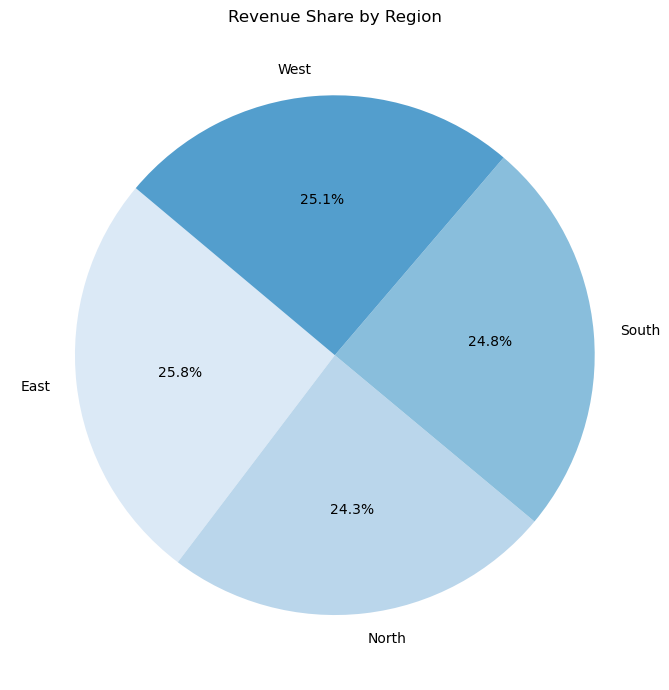

Top Region: East → Revenue: $2,529,088
Bottom Region: West → Revenue: $2,466,009


In [9]:
region_perf = df.groupby('Region')[['TotalRevenue', 'Profit']].sum().sort_values(by='TotalRevenue', ascending=False).reset_index()

region_perf = df.groupby('Region')[['TotalRevenue', 'Profit']].sum().reset_index()
plt.figure(figsize=(7, 7))
plt.pie(region_perf['TotalRevenue'], labels=region_perf['Region'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues'))
plt.title('Revenue Share by Region')
plt.tight_layout()
plt.show()

top_region = region_perf.iloc[0]
bottom_region = region_perf.iloc[-1]

print(f"Top Region: {top_region['Region']} → Revenue: ${top_region['TotalRevenue']:,.0f}")
print(f"Bottom Region: {bottom_region['Region']} → Revenue: ${bottom_region['TotalRevenue']:,.0f}")

## 5. Sales Channel Performance

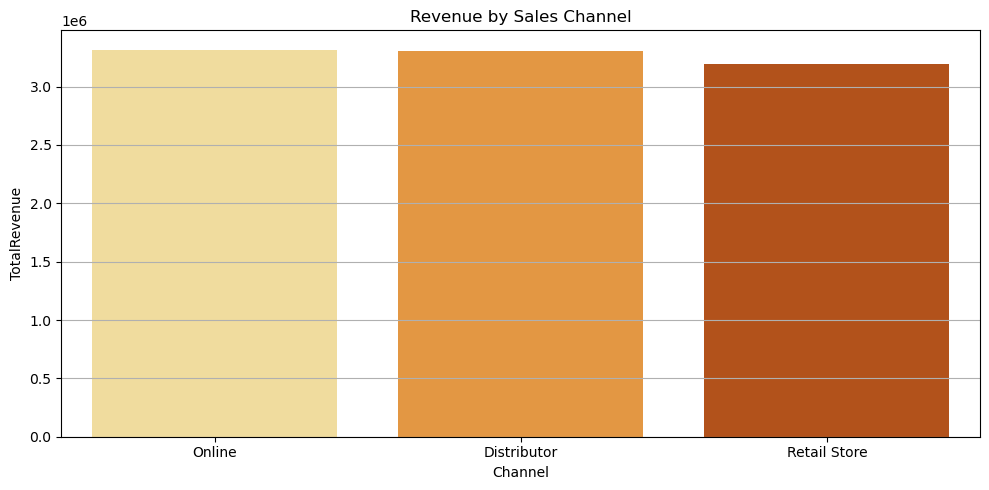

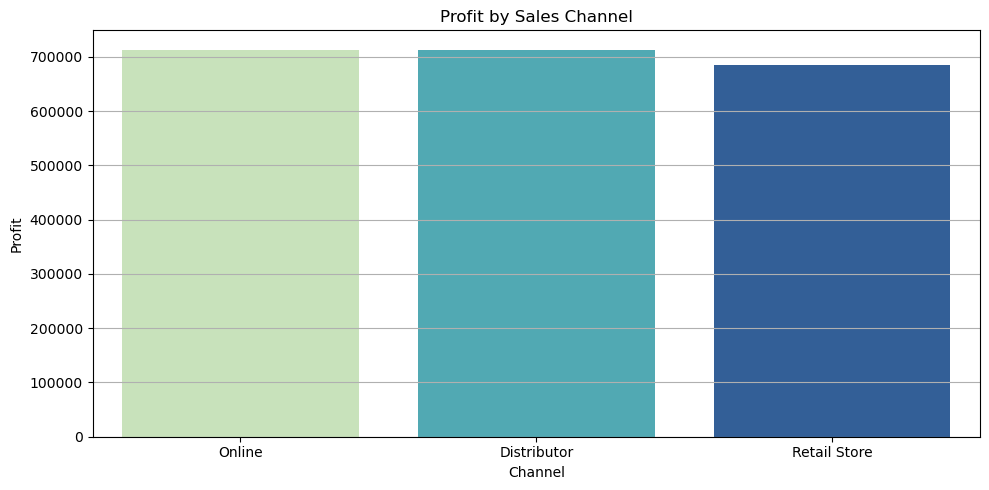

Top Channel: Online → Revenue: $3,316,482
Lowest Channel: Retail Store → Revenue: $3,189,552


In [5]:
channel_perf = df.groupby('Channel')[['TotalRevenue', 'Profit']].sum().sort_values(by='TotalRevenue', ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=channel_perf, x='Channel', y='TotalRevenue', hue='Channel', palette='YlOrBr', legend=False)
plt.title('Revenue by Sales Channel')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=channel_perf, x='Channel', y='Profit', hue='Channel', palette='YlGnBu', legend=False)
plt.title('Profit by Sales Channel')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

best_channel = channel_perf.iloc[0]
least_channel = channel_perf.iloc[-1]

print(f"Top Channel: {best_channel['Channel']} → Revenue: ${best_channel['TotalRevenue']:,.0f}")
print(f"Lowest Channel: {least_channel['Channel']} → Revenue: ${least_channel['TotalRevenue']:,.0f}")

## 6. Profit Margin Analysis by Product Category

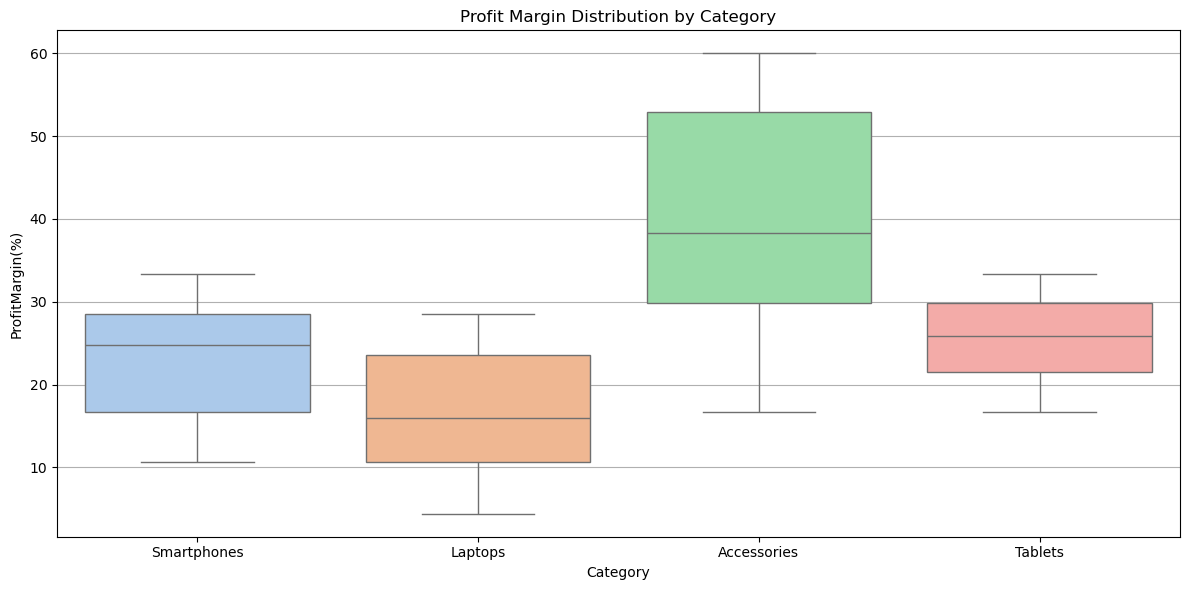

Highest Margin Category: Accessories → 39.43%
Lowest Margin Category: Laptops → 17.28%


In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='ProfitMargin(%)', hue='Category', palette='pastel', legend=False)
plt.title('Profit Margin Distribution by Category')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

category_margin = df.groupby('Category')['ProfitMargin(%)'].mean().sort_values(ascending=False)

print(f"Highest Margin Category: {category_margin.index[0]} → {category_margin.iloc[0]:.2f}%")
print(f"Lowest Margin Category: {category_margin.index[-1]} → {category_margin.iloc[-1]:.2f}%")

## 7. Impact of Discount on Revenue and Profit

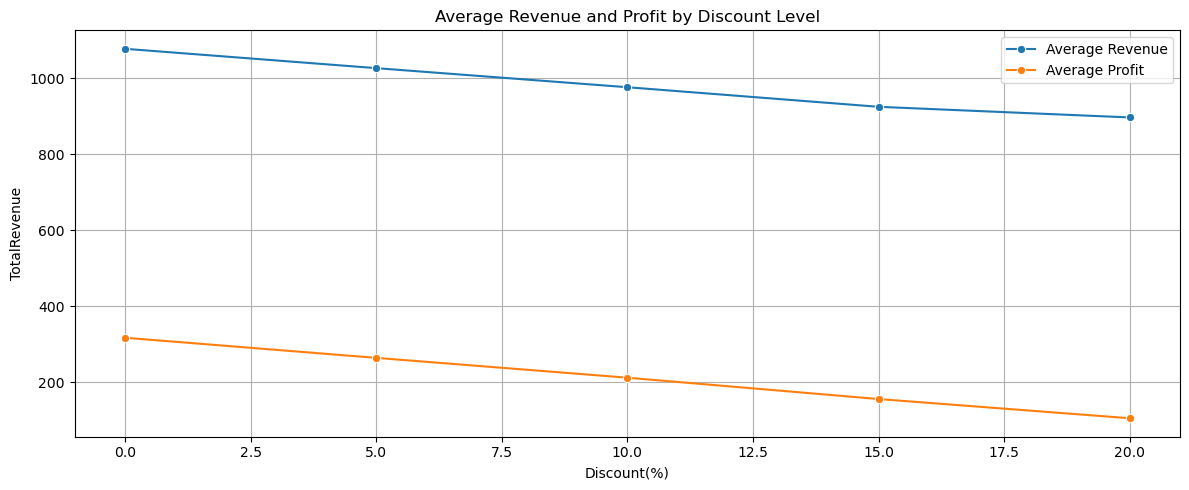

Max Revenue at 0% Discount → $1,078
Max Profit at 0% Discount → $317


In [7]:
discount_summary = df.groupby('Discount(%)')[['TotalRevenue', 'Profit']].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=discount_summary, x='Discount(%)', y='TotalRevenue', label='Average Revenue', marker='o')
sns.lineplot(data=discount_summary, x='Discount(%)', y='Profit', label='Average Profit', marker='o')
plt.title('Average Revenue and Profit by Discount Level')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

max_rev_discount = discount_summary.loc[discount_summary['TotalRevenue'].idxmax()]
max_profit_discount = discount_summary.loc[discount_summary['Profit'].idxmax()]

print(f"Max Revenue at {int(max_rev_discount['Discount(%)'])}% Discount → ${max_rev_discount['TotalRevenue']:,.0f}")
print(f"Max Profit at {int(max_profit_discount['Discount(%)'])}% Discount → ${max_profit_discount['Profit']:,.0f}")

## 8. Weekday Performance Analysis

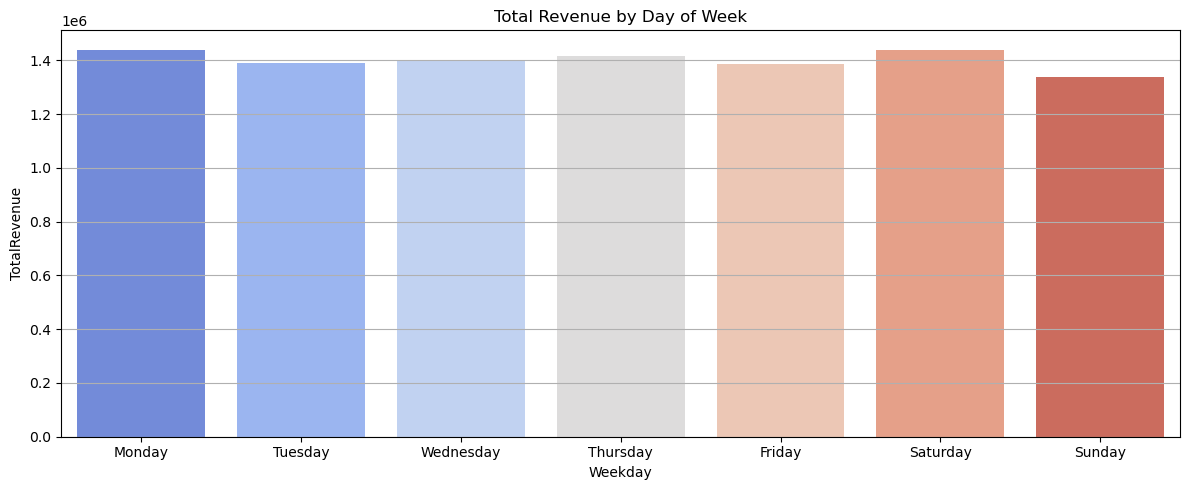

Best Sales Day: Monday
Lowest Sales Day: Sunday


In [8]:
weekday_perf = df.groupby('Weekday')[['TotalRevenue', 'Profit']].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(12, 5))
sns.barplot(x=weekday_perf.index, y=weekday_perf['TotalRevenue'], hue=weekday_perf.index, palette='coolwarm', dodge=False, legend=False)
plt.title('Total Revenue by Day of Week')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

best_day = weekday_perf['TotalRevenue'].idxmax()
worst_day = weekday_perf['TotalRevenue'].idxmin()

print(f"Best Sales Day: {best_day}")
print(f"Lowest Sales Day: {worst_day}")